Ejercicio práctico: Limpieza y transformación de un dataset biosanitario

Tema 3: Aplicación de aspectos avanzados de procesamiento de datos en Python

Objetivo práctico: Aplicar técnicas de limpieza y preprocesamiento de datos
para preparar un conjunto de datos para su análisis.

Descripción
En este ejercicio, vais a trabajar con un conjunto de datos sintéticos
biosanitarios contenido en un único archivo CSV titulado
pacientes_sintetico.csv. Este dataset simula registros de pacientes con
columnas como edad, presión arterial, niveles de colesterol y frecuencia
cardíaca máxima. El archivo ha sido diseñado para incluir imperfecciones
comunes: valores nulos, duplicados y columnas numéricas que necesitan
normalización.

Vuestra tarea consiste en usar este archivo CSV y realizar las siguientes
actividades utilizando Python y bibliotecas como pandas, numpy y sklearn:

1. Imputar valores nulos:
Identificad las columnas con valores faltantes (por ejemplo,
"colesterol" o "presión arterial") y rellenadlos utilizando el promedio
(para datos continuos) o la mediana (para datos con distribuciones no
uniformes).


In [21]:
#importamos librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Para normalización de datos
from sklearn.impute import SimpleImputer  # Para manejar valores faltantes
from sklearn.preprocessing import LabelEncoder  # Para codificar variables categóricas

# Configurar el estilo de las gráficas para mejor visualización
plt.style.use('seaborn-v0_8-whitegrid')  # Aplicar estilo seaborn para gráficos más atractivos

# Cargar los datos generados "pacientes_sintetico.csv"
pacientes_df = pd.read_csv('pacientes_sintetico.csv')


In [35]:
# Lectura
ruta = "pacientes_sintetico.csv"
data = pd.read_csv(ruta)
print('Imprimir el dataset')
print(pacientes_df.shape)


Imprimir el dataset
(5000, 6)


In [37]:
print(data.shape)
data.head()

(5050, 5)


,id_paciente,edad,presion_arterial,colesterol,frec_cardiaca_max
0,1,56,74.7,245.5,106
1,2,69,122.8,216.0,64
2,3,46,147.0,212.4,121
3,4,32,NaN,154.9,143
4,5,60,123.1,153.7,192


In [56]:
print('información del dataset')
pacientes_df.info()
print('Imprimir la estadistica descriptiva')
pacientes_df.describe

información del dataset
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_paciente             5000 non-null   int64  
 1   edad                    5000 non-null   float64
 2   presion_arterial        5000 non-null   float64
 3   colesterol              5000 non-null   float64
 4   frec_cardiaca_max       5000 non-null   float64
 5   colesterol_normalizado  5000 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 273.4 KB
Imprimir la estadistica descriptiva


<bound method NDFrame.describe of       id_paciente  edad  presion_arterial  colesterol  frec_cardiaca_max  \
0               1  56.0              74.7       245.5              106.0   
1               2  69.0             122.8       216.0               64.0   
2               3  46.0             147.0       212.4              121.0   
3               4  32.0             119.5       154.9              143.0   
4               5  60.0             123.1       153.7              192.0   
...           ...   ...               ...         ...                ...   
4995         4996  42.0             120.8       208.5              108.0   
4996         4997  39.0             150.7       176.1               91.0   
4997         4998  48.0              95.6       221.1               74.0   
4998         4999  34.0             111.6       221.9              121.0   
4999         5000  72.0             120.5       246.3              137.0   

      colesterol_normalizado  
0                   0.



=== 1. Limpieza de datos ===

Valores faltantes antes de la limpieza:
id_paciente            0
edad                   0
presion_arterial     472
colesterol           473
frec_cardiaca_max      0
dtype: int64


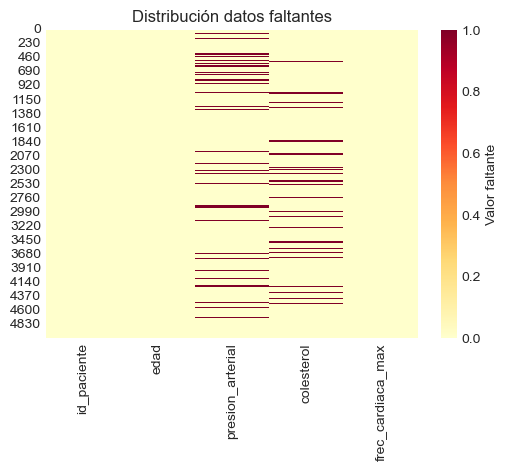


=== Valores faltantes después de la limpieza: ===
id_paciente          0
edad                 0
presion_arterial     0
colesterol           0
frec_cardiaca_max    0
dtype: int64


In [27]:
# 1. Limpieza de datos: Manejo de valores faltantes
print("\n\n=== 1. Limpieza de datos ===")
print("\nValores faltantes antes de la limpieza:")
print(pacientes_df.isnull().sum())

# Crear visualización de matriz de correlación con datos faltantes
plt.figure(figsize=(6, 4))
sns.heatmap(pacientes_df.isnull(), cmap='YlOrRd', cbar_kws={'label':'Valor faltante'}) 

#se le da 3 parametros a sns.heatmap, el primero es el pacientes_de.isnull, 2 los colores y 3 las etiquetas¿?
plt.title('Distribución datos faltantes')
plt.show()

    
# Imputación de valores faltantes usando la mediana para mediciones numéricas
imputer = SimpleImputer(strategy= 'median') #sustituimos los valores nulos por la media

columnas_numericas = ['edad', 'presion_arterial', 'colesterol' , 'frec_cardiaca_max']
#aplicamos la imputacion a las columnas numéricas, reemplazo de los valores faltantes
pacientes_df[columnas_numericas] = imputer.fit_transform(pacientes_df[columnas_numericas])



#imprimimos el resultado
print("\n=== Valores faltantes después de la limpieza: ===")

print(pacientes_df.isnull().sum())


2. Eliminar duplicados:
Buscad y eliminad cualquier fila duplicada en el dataset para asegurar
que cada paciente esté representado una sola vez.


In [30]:
# 2. Eliminación de duplicados
print("\n\n=== 2. Eliminación de duplicados ===")

# Contar cuántos duplicados hay antes de eliminarlos
duplicados_antes = pacientes_df.duplicated().sum()
print(f"Filas duplicadas antes de la eliminación: {duplicados_antes}")

# Eliminar duplicados
pacientes_df = pacientes_df.drop_duplicates()

# Contar cuántos duplicados quedan después de eliminarlos
duplicados_despues = pacientes_df.duplicated().sum()
print(f"Filas duplicadas después de la eliminación: {duplicados_despues}")



=== 2. Eliminación de duplicados ===
Filas duplicadas antes de la eliminación: 50
Filas duplicadas después de la eliminación: 0


3. Normalizar una columna numérica:
Elegid una columna numérica del CSV (como "edad" o "colesterol") y
aplicad la técnica de min-max scaling para escalar sus valores al rango
[0, 1].

In [49]:
scaler = MinMaxScaler()

# Aplicar Min-Max Scaling a la columna "colesterol"
pacientes_df['colesterol_normalizado'] = scaler.fit_transform(pacientes_df[['colesterol']])
print("\n Mostramos los valores originales y normalizados de 'colesterol':")
print(pacientes_df[["colesterol", "colesterol_normalizado"]].head())


#estadística despues de la normalización
print('Estadística del Colesterol normalizado')
print(pacientes_df['colesterol_normalizado'].describe())


 Mostramos los valores originales y normalizados de 'colesterol':
   colesterol  colesterol_normalizado
0       245.5                0.693151
1       216.0                0.592123
2       212.4                0.579795
3       154.9                0.382877
4       153.7                0.378767
Estadística del Colesterol normalizado
count    5000.000000
mean        0.535533
std         0.131328
min         0.000000
25%         0.455822
50%         0.534932
75%         0.617466
max         1.000000
Name: colesterol_normalizado, dtype: float64
